# CAR PRICE PREDICTION_______________________________

# Problem statement

contracted an automobile consulting company to understand the factors on which the pricing of cars depends.
The company wants to know:
* Which variables are significant in predicting the price of a car
* - How well those variables describe the price of a car

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import  seaborn as sns



import warnings
warnings.filterwarnings("ignore")

# Data Gathering

In [2]:
car = pd.read_csv(r"E:\Data-py\V- ASSIGNMENT\raw__data__raw\CarPrice_Assignment.csv")
car.sample(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
191,192,0,volkswagen rabbit,gas,std,four,sedan,fwd,front,100.4,...,136,mpfi,3.19,3.40,8.5,110,5500,19,24,13295.0
31,32,2,honda civic cvcc,gas,std,two,hatchback,fwd,front,86.6,...,92,1bbl,2.91,3.41,9.2,76,6000,31,38,6855.0
82,83,3,mitsubishi outlander,gas,turbo,two,hatchback,fwd,front,95.9,...,156,spdi,3.58,3.86,7.0,145,5000,19,24,12629.0


In [3]:
car.shape

(205, 26)

In [4]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

## Data cleaning and Preparation

In [7]:
companyname = car["CarName"].apply(lambda x:x.split(" ")[0])
car.insert(3,"companyname",companyname)
car.drop(["CarName"],axis=1,inplace = True)
car.head()

,car_ID,symboling,companyname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
car.companyname.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [9]:
#car.sample(15)

In [10]:
#checking for duplicates
car.loc[car.duplicated()]

,car_ID,symboling,companyname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


# 3. Visualizing Data

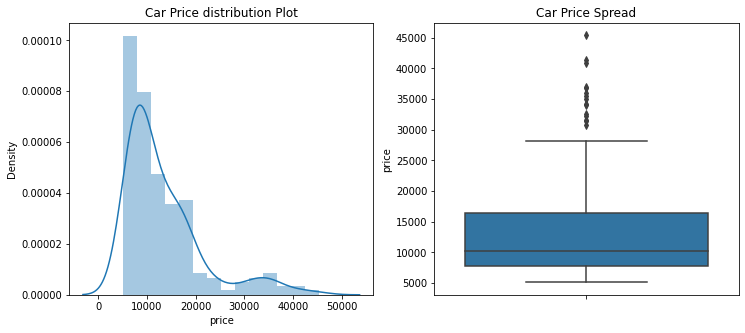

In [11]:
plt.figure(figsize =(12,5))

plt.subplot(1,2,1)
plt.title("Car Price distribution Plot")
sns.distplot(car.price )

plt.subplot(1,2,2)
plt.title("Car Price Spread")
sns.boxplot(y=car.price)

plt.show()

In [12]:
print(car.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


### Inference :
* 1.The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).
* 2.There is a significant difference between the mean and the median of the price distribution.
* 3.The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)

## 3.1 Visualising Categorical Data

In [13]:
car.sample(2)

,car_ID,symboling,companyname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
185,186,2,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,9.0,85,5250,27,34,8195.0
113,114,0,peugeot,gas,std,four,wagon,rwd,front,114.2,...,120,mpfi,3.46,2.19,8.4,95,5000,19,24,16695.0


In [14]:
#car.columns

- CompanyName
- Symboling
- fueltype
- enginetype
- carbody
- doornumber
- enginelocation
- fuelsystem
- cylindernumber
- aspiration
- drivewheel

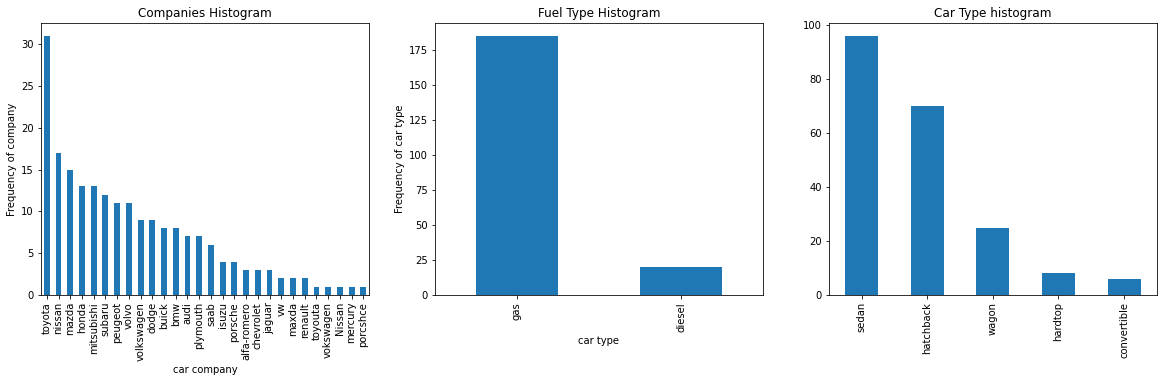

In [15]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt1 = car.companyname.value_counts().plot(kind = "bar")
plt.title("Companies Histogram")
plt1.set(xlabel = "car company", ylabel = "Frequency of company")
#sns.color_palette("Set2")

plt.subplot(1,3,2)
plt1= car.fueltype.value_counts().plot(kind = "bar")
plt.title("Fuel Type Histogram")
plt1.set(xlabel = "Fuel Type", ylabel = "Frequency of Fuel type")


plt.subplot(1,3,3)
pl1 = car.carbody.value_counts().plot(kind = "bar")
plt.title("Car Type histogram")
plt1.set(xlabel = "car type", ylabel = "Frequency of car type")

plt.show()

### Inference :
- Toyota seemed to be favored car company.
- Number of gas fueled cars are more than diesel.
- sedan is the top car type prefered.

<AxesSubplot:title={'center':'Symboling vs Price'}, xlabel='symboling', ylabel='price'>

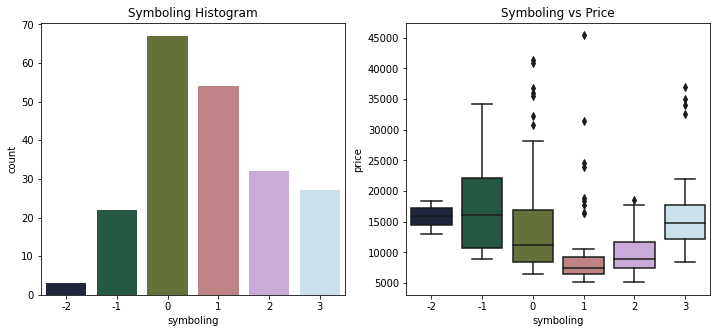

In [16]:
plt.figure(figsize= (12,5))

plt.subplot(1,2,1)
plt.title("Symboling Histogram")
sns.countplot(car.symboling, palette = ("cubehelix"))

plt.subplot(1,2,2)
plt.title("Symboling vs Price")
sns.boxplot(x= car.symboling, y= car.price, palette = ("cubehelix"))

### Inference :
It seems that the symboling with 0 and 1 values have high number of rows (i.e. They are most sold.)
- The cars with -1 symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good). But it seems that symboling with 3 value has the price range similar to -2 value. There is a dip in price at symboling 1.

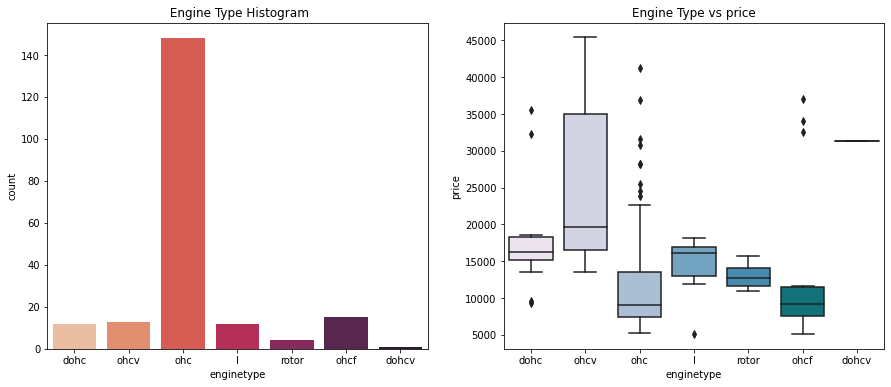

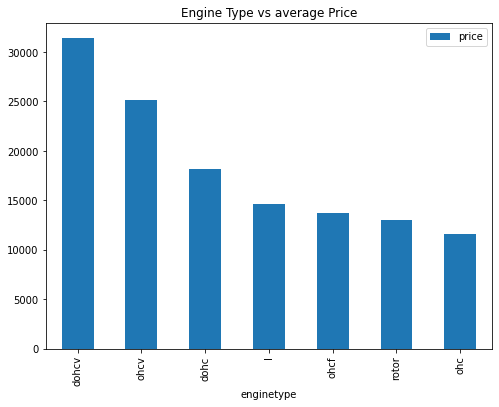

In [17]:
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
plt.title(" Engine Type Histogram")
sns.countplot(car.enginetype, palette = ("rocket_r"))

plt.subplot(1,2,2)
plt.title("Engine Type vs price")
sns.boxplot(x=car.enginetype, y=car.price, palette = ("PuBuGn"))

plt.show()


df = pd.DataFrame(car.groupby(["enginetype"])["price"].mean().sort_values(ascending = False))
df.plot.bar(figsize= (8,6))
plt.title("Engine Type vs average Price")
plt.show()


### Inference :
- ohc Engine type seems to be most favored type.
- ohcv has the highest price range (While dohcv has only one row), ohc and ohcf have the low price range.

<Figure size 1800x432 with 0 Axes>

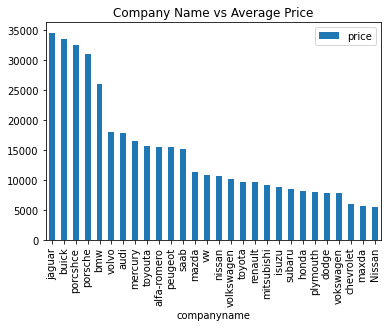

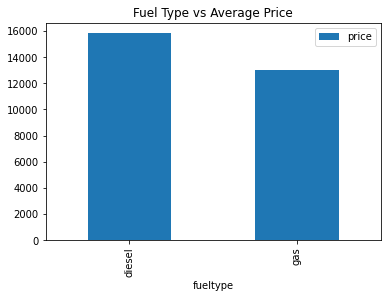

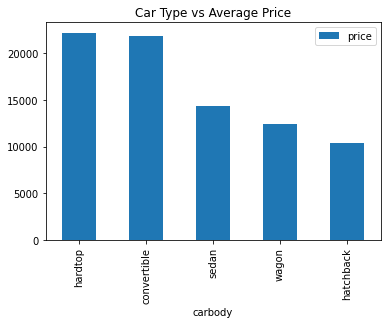

In [18]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(car.groupby(['companyname'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(car.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(car.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

### Inference :
* Jaguar and Buick seem to have highest average price.
* diesel has higher average price than gas.
-hardtop and convertible have higher average price.

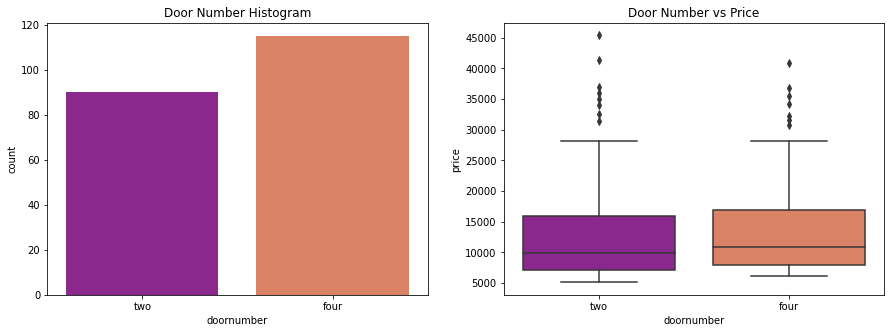

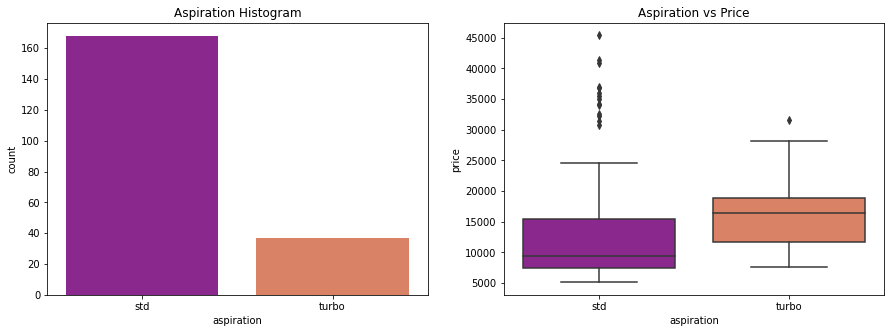

In [19]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(car.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=car.doornumber, y=car.price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(car.aspiration, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=car.aspiration, y=car.price, palette=("plasma"))

plt.show()

### Inference :
- doornumber variable is not affacting the price much. There is no sugnificant difference between the categories in it.
- It seems aspiration with turbo have higher price range than the std(though it has some high values outside the whiskers.)

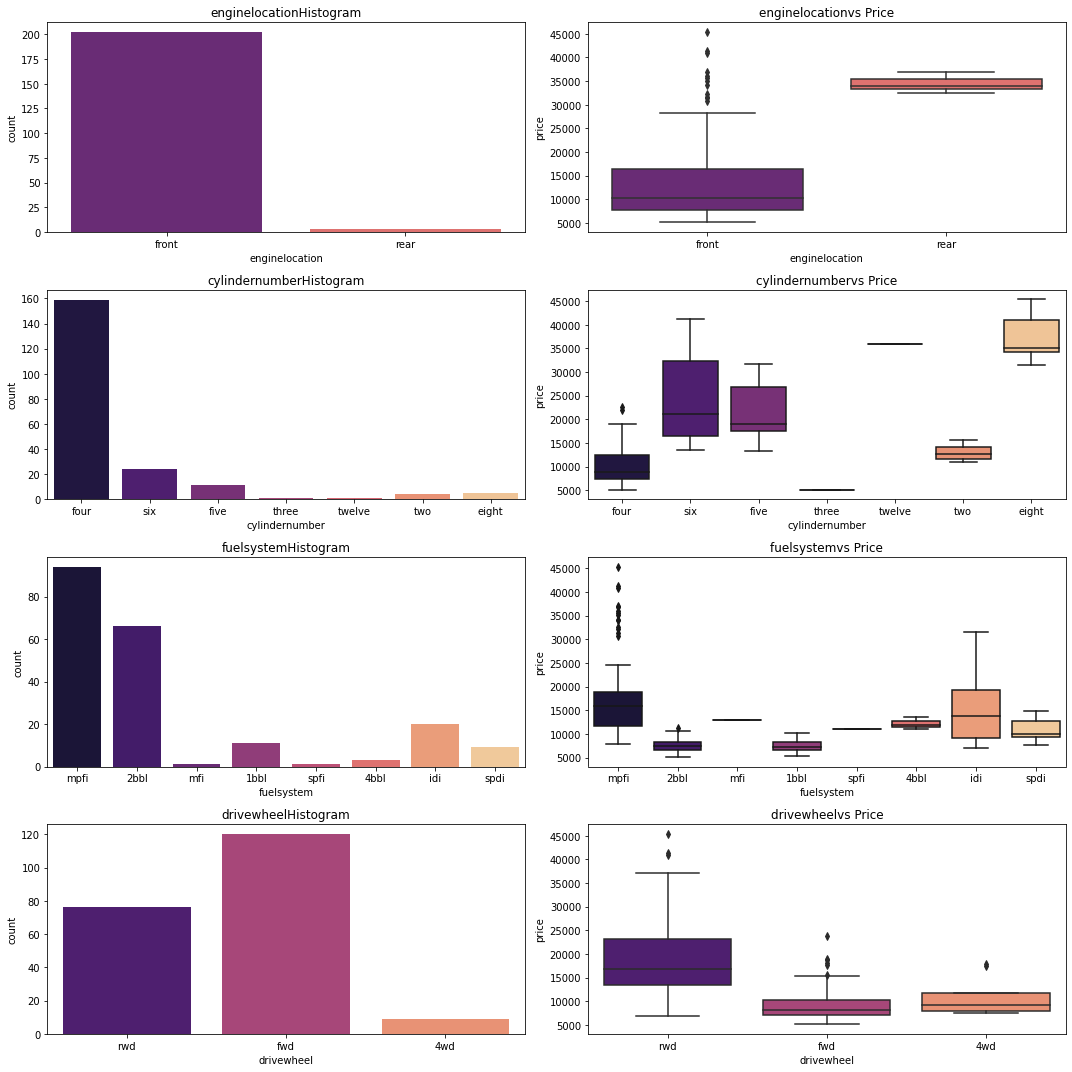

In [20]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+ "Histogram")
    sns.countplot(car[x],palette="magma")
    plt.subplot(4,2,fig+1)
    plt.title(x+"vs Price")
    sns.boxplot(x=car[x], y = car.price, palette=("magma"))
    
plt.figure(figsize=(15,15))

plot_count("enginelocation", 1)
plot_count("cylindernumber", 3)
plot_count("fuelsystem", 5)
plot_count("drivewheel", 7)

plt.tight_layout()


### Inference :
* 1.Very few datapoints for enginelocation categories to make an inference.
* 2.Most common number of cylinders are four, six and five. Though eight cylinders have the highest price range.
* 3.mpfi and 2bbl are most common type of fuel systems. mpfi and idi having the highest price range. But there are few data for other categories to derive any meaningful inference
* 4.A very significant difference in drivewheel category. Most high ranged cars seeme to prefer rwd drivewheel.

## 3.2 Visualising numerical data

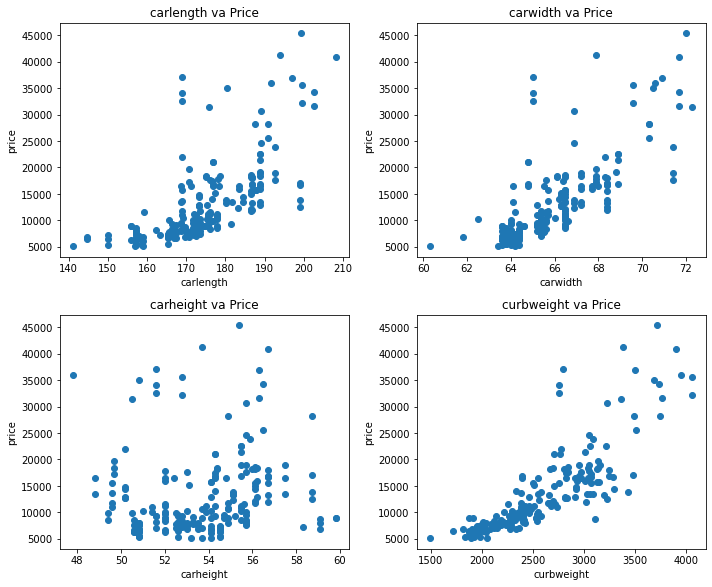

In [21]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(car[x],car["price"])
    plt.title(x+ " va Price")
    plt.ylabel("price")
    plt.xlabel(x)
    
plt.figure(figsize=(10,20))

scatter("carlength",1)
scatter("carwidth",2)
scatter("carheight",3)
scatter("curbweight",4)

plt.tight_layout()

### Inference :
* carwidth, carlength and curbweight seems to have a poitive correlation with price.
* carheight doesn't show any significant trend with price.

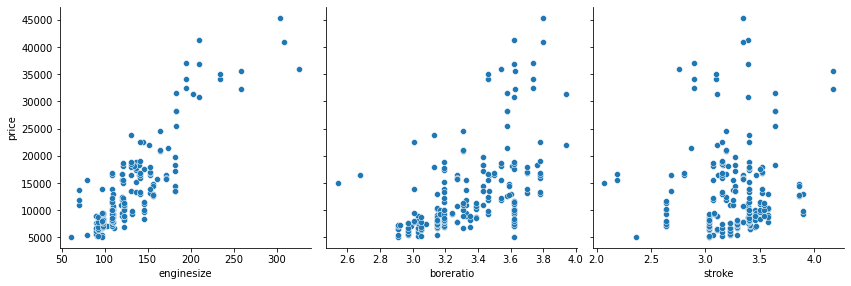

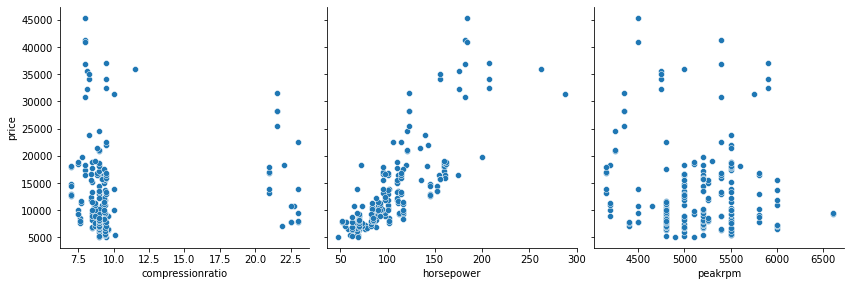

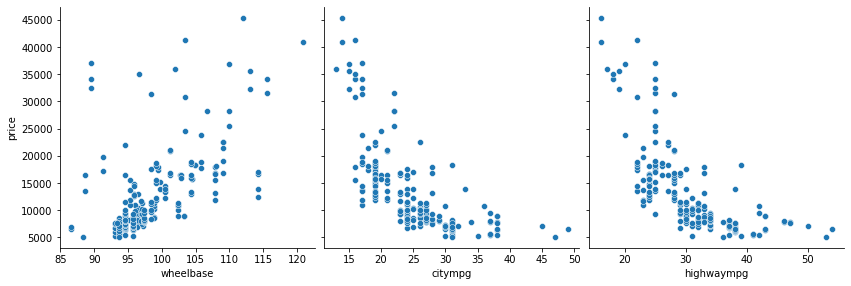

In [22]:
def pp(x,y,z):
    sns.pairplot(car, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

### Inference :
- enginesize, boreratio, horsepower, wheelbase - seem to have a significant positive correlation with price.
- citympg, highwaympg - seem to have a significant negative correlation with price.

In [23]:
np.corrcoef(car["carlength"], car["carwidth"])[0,1]

0.841118268481845

## 4. Driving new  features

In [24]:
#fuel economy
car["fueleconomy"] = (0.55*car["citympg"]) + (0.45*car["highwaympg"])

In [25]:
#Binning the Car Companies based on avg prices of each Company.
car['price'] = car['price'].astype('int')
temp = car.copy()
table = temp.groupby(['companyname'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='companyname')
bins = [0,10000,20000,40000]
car_bin=['Budget','Medium','Highend']
car['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=car_bin)
car.head()

,car_ID,symboling,companyname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


### 5. Analysis

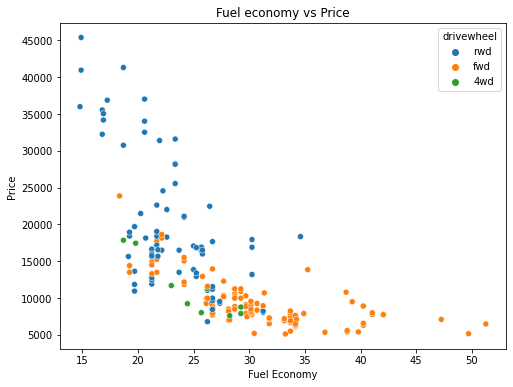

<Figure size 432x288 with 0 Axes>

In [26]:
plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x=car['fueleconomy'],y=car['price'],hue=car['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

### Inference :
fueleconomy has an obvios negative correlation with price and is significant.

<Figure size 1800x432 with 0 Axes>

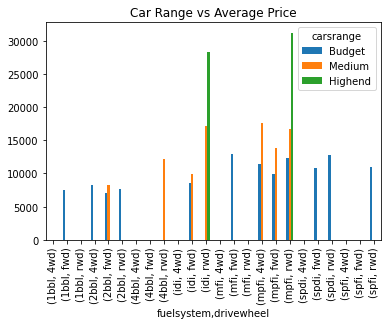

In [27]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(car.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

### Inference :
High ranged cars prefer rwd drivewheel with idi or mpfi fuelsystem.

#### List of significant variables after Visual analysis 
- Car Range 
- Engine Type 
- Fuel type 
- Car Body 
- Aspiration 
- Cylinder Number 
- Drivewheel 
- Curbweight 
- Car Length
- Car width
- Engine Size 
- Boreratio 
- Horse Power 
- Wheel base 
- Fuel Economy 

In [28]:
cars_lr = car[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth', 'carsrange']]
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


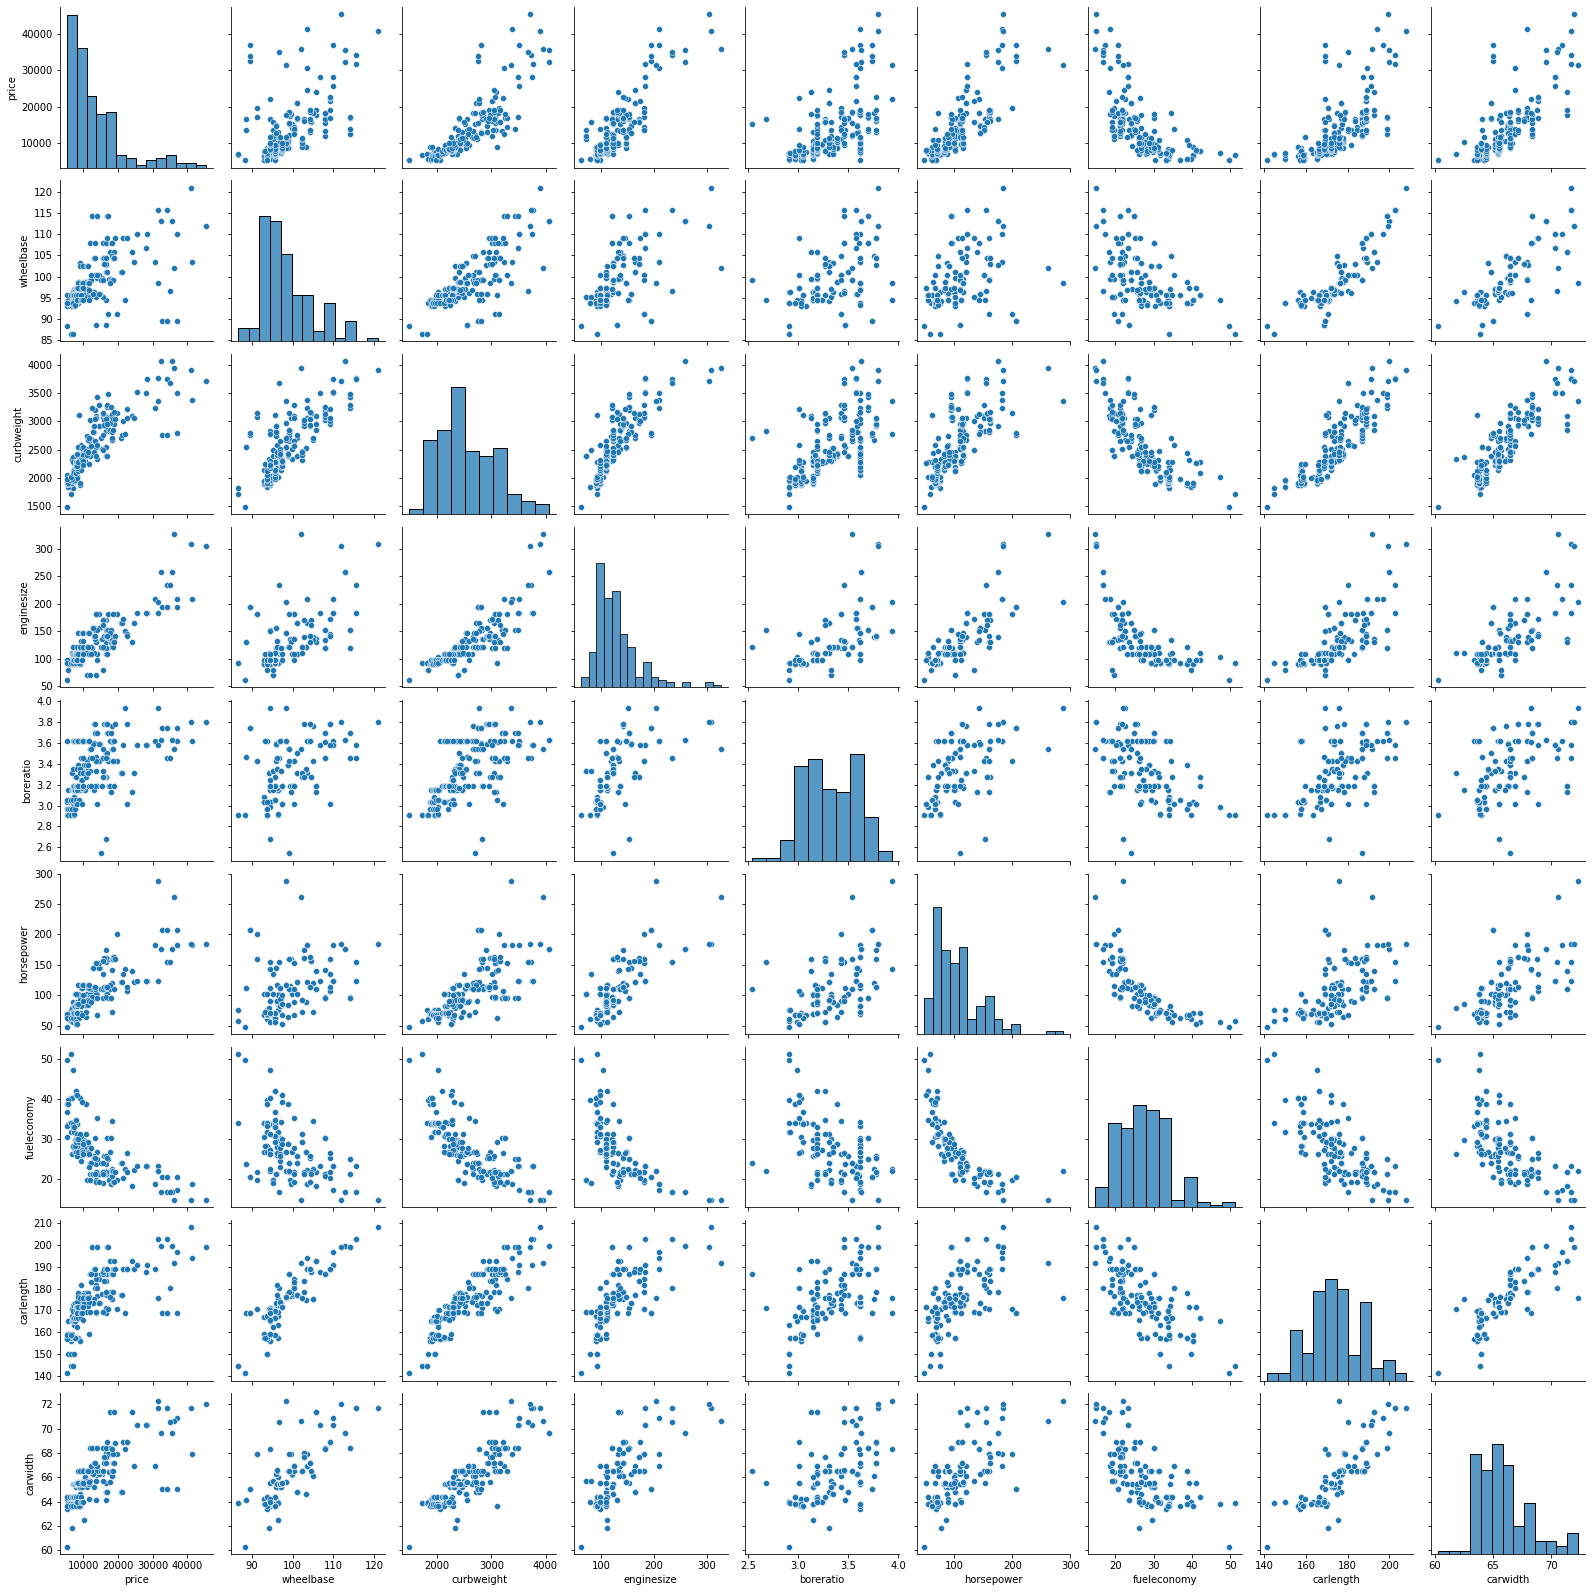

In [29]:
sns.pairplot(cars_lr)
plt.show()

### Step 6 : Dummy Variables

In [30]:
#defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x],drop_first = True)
    df = pd.concat([df,temp], axis=1)
    df.drop([x], axis=1, inplace =True)
    return df

#applying the function to the cars_lr

cars_lr = dummies("fueltype", cars_lr)
cars_lr = dummies("aspiration", cars_lr)
cars_lr = dummies("carbody", cars_lr)
cars_lr = dummies("drivewheel", cars_lr)
cars_lr = dummies("enginetype", cars_lr)
cars_lr = dummies("cylindernumber", cars_lr)
cars_lr = dummies("carsrange", cars_lr)
#cars_lr = dummies("fueltype", cars_lr)


In [32]:
cars_lr.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,...,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,...,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,...,0,0,1,0,0,0,0,0,1,0


In [33]:
cars_lr.shape

(205, 31)

## Step 7 : Train-Test Split and feature scaling

In [34]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(cars_lr, train_size = 0.7, test_size = 0.3, random_state = 11)

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars =['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_train[num_vars]= scaler.fit_transform(df_train[num_vars])


In [37]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
69,0.572414,0.586006,0.778510,0.460377,0.650485,0.312500,0.244986,0.692537,0.833333,0,...,0,0,1,0,0,0,0,0,0,1
128,0.792165,0.084548,0.508922,0.501887,0.805825,0.662500,0.166189,0.414925,0.391667,1,...,0,0,0,0,1,0,0,0,0,1
193,0.178045,0.402332,0.416990,0.181132,0.271845,0.166667,0.369628,0.626866,0.550000,1,...,0,0,0,1,0,0,0,0,1,0
32,0.006976,0.206997,0.135376,0.067925,0.000000,0.050000,0.716332,0.132836,0.308333,1,...,0,0,0,1,0,0,0,0,0,0
15,0.636562,0.492711,0.675718,0.558491,0.689320,0.558333,0.111748,0.714925,0.550000,1,...,0,0,0,0,1,0,0,0,0,1


In [39]:
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.214399,0.375624,0.433417,0.262172,0.429900,0.240064,0.362544,0.502421,0.484207,0.888112,...,0.076923,0.013986,0.069930,0.762238,0.104895,0.006993,0.006993,0.013986,0.384615,0.132867
std,0.208533,0.187025,0.215847,0.171030,0.261084,0.170806,0.195222,0.193968,0.198344,0.316337,...,0.267406,0.117845,0.255926,0.427209,0.307495,0.083624,0.083624,0.117845,0.488214,0.340624
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.068976,0.230321,0.272692,0.139623,0.233010,0.095833,0.197708,0.376119,0.308333,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.138523,0.309038,0.377036,0.226415,0.407767,0.195833,0.340974,0.483582,0.441667,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.298371,0.489796,0.596974,0.320755,0.669903,0.308333,0.471347,0.679104,0.575000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


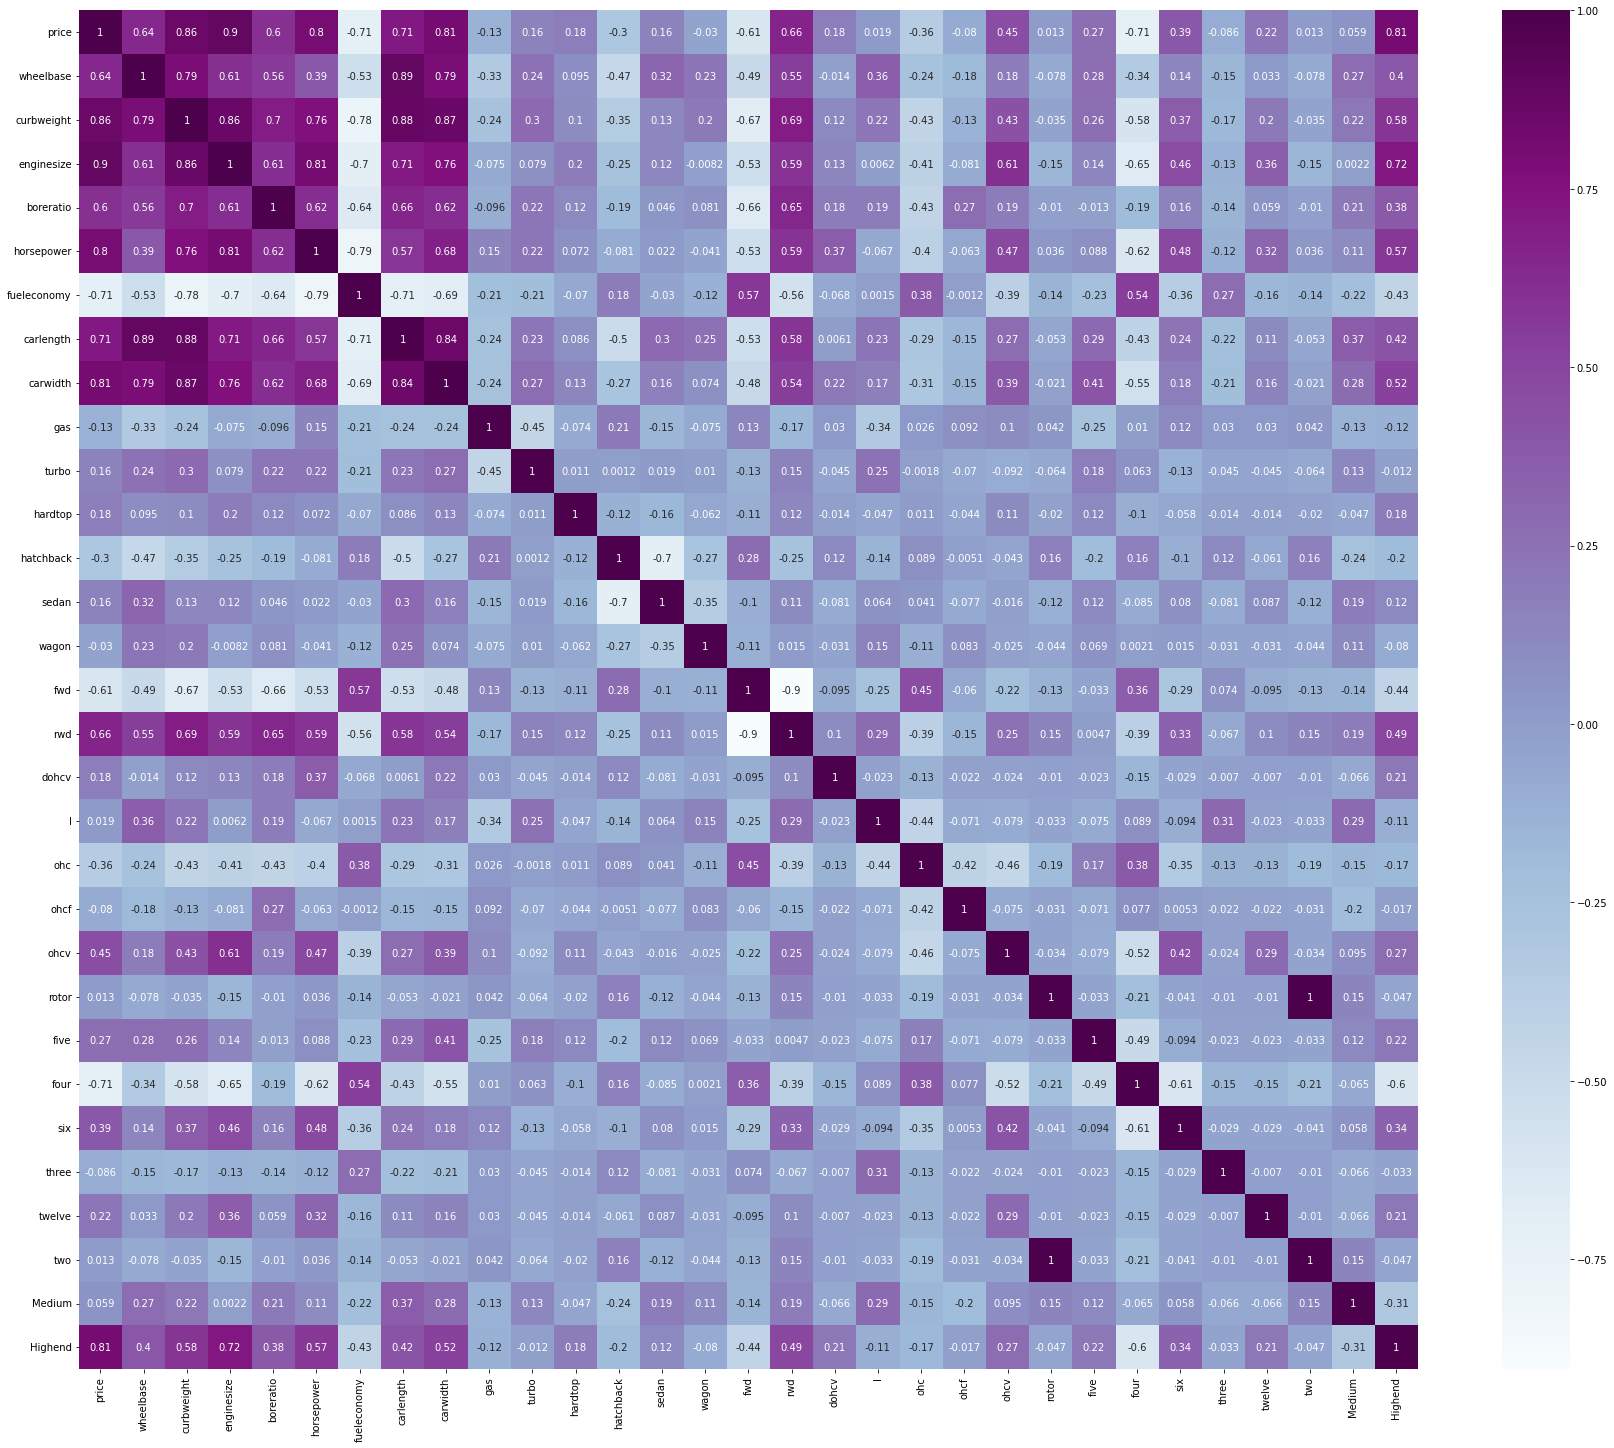

In [44]:
#correlation using heat map
plt.figure(figsize=(30,25))
sns.heatmap(df_train.corr(), annot = True, cmap = "BuPu")
plt.show()

* **Highly correlated variables to price are - curbweight, enginesize, horsepower,carwidth and highend.**

In [45]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

## Step 8 : Model Building

In [46]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
# lm = LinearRegression()
# lm.fit(X_train,y_train)
# rfe = RFE(lm, 10)
# rfe = rfe.fit(X_train, y_train)

In [56]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm)
rfe = rfe.fit(X_train,y_train)

In [58]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('wheelbase', True, 1),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 5),
 ('horsepower', True, 1),
 ('fueleconomy', True, 1),
 ('carlength', False, 3),
 ('carwidth', True, 1),
 ('gas', False, 13),
 ('turbo', False, 16),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 10),
 ('rwd', False, 14),
 ('dohcv', True, 1),
 ('l', False, 12),
 ('ohc', False, 7),
 ('ohcf', False, 6),
 ('ohcv', False, 11),
 ('rotor', False, 15),
 ('five', False, 2),
 ('four', True, 1),
 ('six', True, 1),
 ('three', False, 8),
 ('twelve', True, 1),
 ('two', False, 4),
 ('Medium', False, 9),
 ('Highend', True, 1)]

In [59]:
X_train.columns[rfe.support_]

Index(['wheelbase', 'curbweight', 'enginesize', 'horsepower', 'fueleconomy',
       'carwidth', 'hardtop', 'hatchback', 'sedan', 'wagon', 'dohcv', 'four',
       'six', 'twelve', 'Highend'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [60]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,wheelbase,curbweight,enginesize,horsepower,fueleconomy,carwidth,hardtop,hatchback,sedan,wagon,dohcv,four,six,twelve,Highend
69,0.586006,0.778510,0.460377,0.312500,0.244986,0.833333,1,0,0,0,0,0,0,0,1
128,0.084548,0.508922,0.501887,0.662500,0.166189,0.391667,0,0,0,0,0,0,1,0,1
193,0.402332,0.416990,0.181132,0.166667,0.369628,0.550000,0,0,0,1,0,1,0,0,0
32,0.206997,0.135376,0.067925,0.050000,0.716332,0.308333,0,1,0,0,0,1,0,0,0
15,0.492711,0.675718,0.558491,0.558333,0.111748,0.550000,0,0,1,0,0,0,1,0,1


In [61]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

## MODEL 1

In [62]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     159.6
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           1.15e-74
Time:                        16:59:27   Log-Likelihood:                 235.41
No. Observations:                 143   AIC:                            -438.8
Df Residuals:                     127   BIC:                            -391.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0847      0.047      1.789      

**p-vale of twelve seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.**

In [63]:
X_train_new = X_train_rfe.drop(["twelve"], axis = 1)

In [66]:
X_train_new.sample(2)

,wheelbase,curbweight,enginesize,horsepower,fueleconomy,carwidth,hardtop,hatchback,sedan,wagon,dohcv,four,six,Highend
146,0.303207,0.311094,0.177358,0.141667,0.429799,0.425,0,0,0,1,0,1,0,0
13,0.425656,0.495345,0.388679,0.304167,0.267908,0.375,0,0,1,0,0,0,1,1


### MODEL 2

In [67]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     165.5
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           9.81e-75
Time:                        17:01:41   Log-Likelihood:                 232.68
No. Observations:                 143   AIC:                            -435.4
Df Residuals:                     128   BIC:                            -390.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1138      0.046      2.462      

In [68]:
X_train_new = X_train_new.drop(["fueleconomy"], axis = 1)

In [70]:
X_train_new.sample(2)

,const,wheelbase,curbweight,enginesize,horsepower,carwidth,hardtop,hatchback,sedan,wagon,dohcv,four,six,Highend
4,1.0,0.373178,0.518231,0.283019,0.279167,0.508333,0,0,1,0,0,0,0,0
78,1.0,0.206997,0.200155,0.116981,0.083333,0.341667,0,1,0,0,0,1,0,0


### MODEL 3

In [71]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     177.6
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           1.41e-75
Time:                        17:03:00   Log-Likelihood:                 231.92
No. Observations:                 143   AIC:                            -435.8
Df Residuals:                     129   BIC:                            -394.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1461      0.037      3.952      0.0

In [76]:
#checkVIF(X_train)

In [72]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,77.21
8,sedan,13.08
2,curbweight,12.31
7,hatchback,10.98
3,enginesize,7.81
5,carwidth,7.05
9,wagon,6.43
1,wheelbase,6.11
4,horsepower,5.53
11,four,2.90


**dropping curbweight because of high VIF value. (shows that curbweight has high multicollinearity.**

In [77]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

In [78]:
X_train_new.sample(2)

,const,wheelbase,enginesize,horsepower,carwidth,hardtop,hatchback,sedan,wagon,dohcv,four,six,Highend
104,1.0,0.137026,0.452830,0.466667,0.633333,0,1,0,0,0,0,1,0
44,1.0,0.230321,0.109434,0.091667,0.275000,0,0,1,0,0,1,0,0


### MODEL 4

In [79]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     192.7
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           1.44e-76
Time:                        17:06:09   Log-Likelihood:                 231.51
No. Observations:                 143   AIC:                            -437.0
Df Residuals:                     130   BIC:                            -398.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1516      0.036      4.164      0.0

In [80]:
checkVIF(X_train_new)

,Features,VIF
0,const,74.97
7,sedan,12.26
6,hatchback,10.24
2,enginesize,6.83
8,wagon,6.41
4,carwidth,6.23
1,wheelbase,4.96
3,horsepower,4.84
10,four,2.89
12,Highend,2.49


**dropping sedan because of high VIF value.**

In [82]:
X_train_new = X_train_new.drop(["sedan"], axis = 1)

### MODEL 5

In [83]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     159.4
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           3.54e-70
Time:                        17:07:29   Log-Likelihood:                 212.41
No. Observations:                 143   AIC:                            -400.8
Df Residuals:                     131   BIC:                            -365.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0196      0.028     -0.707      0.4

In [84]:
checkVIF(X_train_new)

,Features,VIF
0,const,33.34
2,enginesize,6.69
4,carwidth,6.14
3,horsepower,4.83
1,wheelbase,4.21
9,four,2.88
11,Highend,2.46
10,six,2.24
8,dohcv,1.46
6,hatchback,1.41


**dropping wagon because of high p-value.**

In [85]:
X_train_new = X_train_new.drop(["wagon"], axis = 1)

### MODEL 6

In [86]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     173.1
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           9.13e-71
Time:                        17:08:53   Log-Likelihood:                 211.04
No. Observations:                 143   AIC:                            -400.1
Df Residuals:                     132   BIC:                            -367.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0236      0.028     -0.854      0.3

In [87]:
checkVIF(X_train_new)

,Features,VIF
0,const,33.05
2,enginesize,6.67
4,carwidth,6.11
3,horsepower,4.83
1,wheelbase,4.04
8,four,2.87
10,Highend,2.43
9,six,2.24
7,dohcv,1.46
6,hatchback,1.37


### MODEL 7

In [88]:
#Dropping dohcv to see the changes in model statistics
X_train_new = X_train_new.drop(["dohcv"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     179.1
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           8.14e-70
Time:                        17:09:40   Log-Likelihood:                 205.80
No. Observations:                 143   AIC:                            -391.6
Df Residuals:                     133   BIC:                            -362.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0180      0.029     -0.631      0.5

,Features,VIF
0,const,32.91
2,enginesize,6.09
4,carwidth,6.02
3,horsepower,4.04
1,wheelbase,3.99
7,four,2.87
9,Highend,2.32
8,six,2.19
6,hatchback,1.37
5,hardtop,1.11


### Step 9 : Residual Analysis of Model

In [89]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

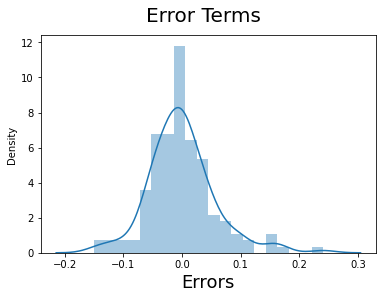

In [90]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

**Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.**

## Step 10 : Prediction and Evaluation

In [91]:
#Scaling the test set
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [92]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [93]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [94]:
# Making predictions
y_pred = lm.predict(X_test_new)

### Evaluation of test via comparison of y_pred and y_test

In [95]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8092230224076802

Text(0, 0.5, 'y_pred')

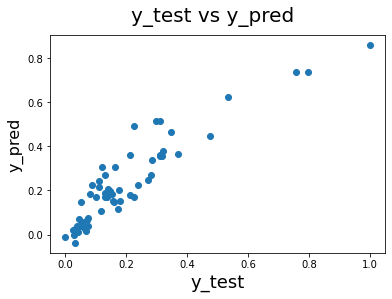

In [96]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

### Evaluation of the model using Statistics

In [97]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     179.1
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           8.14e-70
Time:                        17:12:49   Log-Likelihood:                 205.80
No. Observations:                 143   AIC:                            -391.6
Df Residuals:                     133   BIC:                            -362.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0180      0.029     -0.631      0.5

### Inference :
**R-sqaured and Adjusted R-squared (extent of fit) - 0.899 and 0.896 - 90% variance explained.**
* F-stats and Prob(F-stats) (overall model fit) - 308.0 and 1.04e-67(approx. 0.0) - Model fir is significant and explained 90% variance is just not by chance.
* p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.